<a href="https://www.kaggle.com/code/claricesatikoaoto/ecuador-sales-analysis-i?scriptVersionId=132413936" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/store-sales-time-series-forecasting/oil.csv
/kaggle/input/store-sales-time-series-forecasting/sample_submission.csv
/kaggle/input/store-sales-time-series-forecasting/holidays_events.csv
/kaggle/input/store-sales-time-series-forecasting/stores.csv
/kaggle/input/store-sales-time-series-forecasting/train.csv
/kaggle/input/store-sales-time-series-forecasting/test.csv
/kaggle/input/store-sales-time-series-forecasting/transactions.csv


# Libraries

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

import warnings
warnings.filterwarnings('ignore')

## Load dataset

In [3]:
# train
df_train = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/train.csv',
                      parse_dates=['date'])
df_train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [4]:
#transaction
df_transaction = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/transactions.csv',
                            parse_dates=['date'])
df_transaction.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [5]:
#stores
df_stores = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/stores.csv')
df_stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [6]:
#holidays
df_holidays = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/holidays_events.csv',
                         parse_dates=['date'])
df_holidays.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [7]:
#test
df_test = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/test.csv',
                     parse_dates=['date'])
df_test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [8]:
df_oil = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/oil.csv',
                    parse_dates=['date'])
df_oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


## Data description

**Additional Notes**

Wages in the public sector are paid every two weeks on the 15 th and on the last day of the month. **Supermarket sales could be affected by this.**
A magnitude 7.8 earthquake struck Ecuador on **April 16, 2016**. People rallied in relief efforts donating water and other first need products which greatly affected supermarket sales for several weeks after the earthquake.

### Train

train.csv
The training data, comprising time series of features store_nbr, family, and onpromotion as well as the target sales.
* store_nbr identifies the store at which the products are sold.
* family identifies the type of product sold.
* sales gives the total sales for a product family at a particular store at a given date. Fractional values are possible since products can be sold in fractional units (1.5 kg of cheese, for instance, as opposed to 1 bag of chips).
* onpromotion gives the total number of items in a product family that were being promoted at a store at a given date.

### Store

stores.csv
* Store metadata, including city, state, type, and cluster.
* cluster is a grouping of similar stores.

### Holidays

holidays_events.csv

Holidays and Events, with metadata

NOTE: Pay special attention to the transferred column. A holiday that is transferred officially falls on that calendar day, but was moved to another date by the government. A transferred day is more like a normal day than a holiday. To find the day that it was actually celebrated, look for the corresponding row where type is Transfer. For example, the holiday Independencia de Guayaquil was transferred from 2012-10-09 to 2012-10-12, which means it was celebrated on 2012-10-12. Days that are type Bridge are extra days that are added to a holiday (e.g., to extend the break across a long weekend). These are frequently made up by the type Work Day which is a day not normally scheduled for work (e.g., Saturday) that is meant to payback the Bridge.
Additional holidays are days added a regular calendar holiday, for example, as typically happens around Christmas (making Christmas Eve a holiday).

## Exploratory Data Analysis

**Insights**

In dataset we have:
1. historical data (from 2013-01-01 to 2017-08-15) about 54 stores in 54 cities in Equador (total entries: 3000888), with 1694.60 transactions in mean during all period. 
1. Aumotive is most frequenty item appears in family category, it's showed 90936 times.
1. The maximus sales is USD .247170e+05, the mean is USD 3.577757e+02, standard deviation, USD 1.101998e+03. Perhaps we have some outliers there.
1. Capital Quito sold most of products in dataset and 18 stores are classified as D type. 
1. Its informed about 350 holidays in all country. Let's check if those influence in sales time series.
1. As oil dependance country, let's check how oil price affect directly to sales percentage(check correlation)


**df_train**

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB


In [10]:
df_train.isnull().any()

id             False
date           False
store_nbr      False
family         False
sales          False
onpromotion    False
dtype: bool

In [11]:
df_train.describe(include='all')

,id,date,store_nbr,family,sales,onpromotion
count,3.000888e+06,3000888,3.000888e+06,3000888,3.000888e+06,3.000888e+06
unique,NaN,1684,NaN,33,NaN,NaN
top,NaN,2013-01-01 00:00:00,NaN,AUTOMOTIVE,NaN,NaN
freq,NaN,1782,NaN,90936,NaN,NaN
first,NaN,2013-01-01 00:00:00,NaN,NaN,NaN,NaN
last,NaN,2017-08-15 00:00:00,NaN,NaN,NaN,NaN
mean,1.500444e+06,NaN,2.750000e+01,NaN,3.577757e+02,2.602770e+00
std,8.662819e+05,NaN,1.558579e+01,NaN,1.101998e+03,1.221888e+01
min,0.000000e+00,NaN,1.000000e+00,NaN,0.000000e+00,0.000000e+00
25%,7.502218e+05,NaN,1.400000e+01,NaN,0.000000e+00,0.000000e+00


**df_stores**

In [12]:
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [13]:
df_stores.describe(include='all')

,store_nbr,city,state,type,cluster
count,54.000000,54,54,54,54.000000
unique,NaN,22,16,5,NaN
top,NaN,Quito,Pichincha,D,NaN
freq,NaN,18,19,18,NaN
mean,27.500000,NaN,NaN,NaN,8.481481
std,15.732133,NaN,NaN,NaN,4.693395
min,1.000000,NaN,NaN,NaN,1.000000
25%,14.250000,NaN,NaN,NaN,4.000000
50%,27.500000,NaN,NaN,NaN,8.500000
75%,40.750000,NaN,NaN,NaN,13.000000


**df_holiday**

In [14]:
df_holidays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         350 non-null    datetime64[ns]
 1   type         350 non-null    object        
 2   locale       350 non-null    object        
 3   locale_name  350 non-null    object        
 4   description  350 non-null    object        
 5   transferred  350 non-null    bool          
dtypes: bool(1), datetime64[ns](1), object(4)
memory usage: 14.1+ KB


**df_oil**

In [15]:
df_oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1218 non-null   datetime64[ns]
 1   dcoilwtico  1175 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.2 KB


In [16]:
df_oil.describe(include='all')

,date,dcoilwtico
count,1218,1175.000000
unique,1218,NaN
top,2013-01-01 00:00:00,NaN
freq,1,NaN
first,2013-01-01 00:00:00,NaN
last,2017-08-31 00:00:00,NaN
mean,NaN,67.714366
std,NaN,25.630476
min,NaN,26.190000
25%,NaN,46.405000


**df_transactions**

In [17]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.9 MB


In [18]:
df_transaction.transactions.describe()

count    83488.000000
mean      1694.602158
std        963.286644
min          5.000000
25%       1046.000000
50%       1393.000000
75%       2079.000000
max       8359.000000
Name: transactions, dtype: float64

## Feature engineering and data cleaning

**Merging datasets**

In [19]:
#df_train and df_stores
df_train_merged = df_train.merge(df_stores, on='store_nbr')
df_train_merged.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13


In [20]:
#sort_values by date
df_train_merged.sort_values(by=['date'], inplace=True)

In [21]:
df_holidays.rename(columns={'locale_name':'state'}, inplace=True)
df_holidays.head()

,date,type,locale,state,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [22]:
#df_train and df_holidays

df_merged= pd.merge_asof(df_train_merged, df_holidays,
                         on='date', 
                         by='state')
df_merged.head()


,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,type_y,locale,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN
1,1238,2013-01-01,43,HOME APPLIANCES,0.0,0,Esmeraldas,Esmeraldas,E,10,Holiday,Local,Fundacion de Esmeraldas,False
2,1237,2013-01-01,43,HOME AND KITCHEN II,0.0,0,Esmeraldas,Esmeraldas,E,10,Holiday,Local,Fundacion de Esmeraldas,False
3,1236,2013-01-01,43,HOME AND KITCHEN I,0.0,0,Esmeraldas,Esmeraldas,E,10,Holiday,Local,Fundacion de Esmeraldas,False
4,1235,2013-01-01,43,HARDWARE,0.0,0,Esmeraldas,Esmeraldas,E,10,Holiday,Local,Fundacion de Esmeraldas,False


In [23]:
#df_merged and df_oil
df_merged_oil = pd.merge_asof(df_merged, df_oil,
                         on='date', )
                        #  by='state')
df_merged_oil.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,type_y,locale,description,transferred,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN,NaN
1,1238,2013-01-01,43,HOME APPLIANCES,0.0,0,Esmeraldas,Esmeraldas,E,10,Holiday,Local,Fundacion de Esmeraldas,False,NaN
2,1237,2013-01-01,43,HOME AND KITCHEN II,0.0,0,Esmeraldas,Esmeraldas,E,10,Holiday,Local,Fundacion de Esmeraldas,False,NaN
3,1236,2013-01-01,43,HOME AND KITCHEN I,0.0,0,Esmeraldas,Esmeraldas,E,10,Holiday,Local,Fundacion de Esmeraldas,False,NaN
4,1235,2013-01-01,43,HARDWARE,0.0,0,Esmeraldas,Esmeraldas,E,10,Holiday,Local,Fundacion de Esmeraldas,False,NaN


In [24]:
#df_merged and transactions

df_merged = pd.merge_asof(df_merged_oil, df_transaction,
                         on='date', 
                         by='store_nbr')
df_merged.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,type_y,locale,description,transferred,dcoilwtico,transactions
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN,NaN,NaN
1,1238,2013-01-01,43,HOME APPLIANCES,0.0,0,Esmeraldas,Esmeraldas,E,10,Holiday,Local,Fundacion de Esmeraldas,False,NaN,NaN
2,1237,2013-01-01,43,HOME AND KITCHEN II,0.0,0,Esmeraldas,Esmeraldas,E,10,Holiday,Local,Fundacion de Esmeraldas,False,NaN,NaN
3,1236,2013-01-01,43,HOME AND KITCHEN I,0.0,0,Esmeraldas,Esmeraldas,E,10,Holiday,Local,Fundacion de Esmeraldas,False,NaN,NaN
4,1235,2013-01-01,43,HARDWARE,0.0,0,Esmeraldas,Esmeraldas,E,10,Holiday,Local,Fundacion de Esmeraldas,False,NaN,NaN


In [25]:
#checking the result of merges.
df_train.shape[0] == df_train_merged.shape[0] == df_merged.shape[0]

True

In [26]:
#Nem todas as cidades tem as datas comemorativas na base de dados. 
#Por isso, há valores nulos em algunas linhas.
df_merged.isnull().any()

id              False
date            False
store_nbr       False
family          False
sales           False
onpromotion     False
city            False
state           False
type_x          False
cluster         False
type_y           True
locale           True
description      True
transferred      True
dcoilwtico       True
transactions     True
dtype: bool

In [27]:
df_merged.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,type_y,locale,description,transferred,dcoilwtico,transactions
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN,NaN,NaN
1,1238,2013-01-01,43,HOME APPLIANCES,0.0,0,Esmeraldas,Esmeraldas,E,10,Holiday,Local,Fundacion de Esmeraldas,False,NaN,NaN
2,1237,2013-01-01,43,HOME AND KITCHEN II,0.0,0,Esmeraldas,Esmeraldas,E,10,Holiday,Local,Fundacion de Esmeraldas,False,NaN,NaN
3,1236,2013-01-01,43,HOME AND KITCHEN I,0.0,0,Esmeraldas,Esmeraldas,E,10,Holiday,Local,Fundacion de Esmeraldas,False,NaN,NaN
4,1235,2013-01-01,43,HARDWARE,0.0,0,Esmeraldas,Esmeraldas,E,10,Holiday,Local,Fundacion de Esmeraldas,False,NaN,NaN


In [28]:
df_merged.tail()

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,type_y,locale,description,transferred,dcoilwtico,transactions
3000883,3000276,2017-08-15,41,HOME AND KITCHEN I,31.0,0,Machala,El Oro,D,4,NaN,NaN,NaN,NaN,47.57,1003.0
3000884,3000277,2017-08-15,41,HOME AND KITCHEN II,17.0,0,Machala,El Oro,D,4,NaN,NaN,NaN,NaN,47.57,1003.0
3000885,3000278,2017-08-15,41,HOME APPLIANCES,0.0,0,Machala,El Oro,D,4,NaN,NaN,NaN,NaN,47.57,1003.0
3000886,3000267,2017-08-15,41,CELEBRATION,5.0,0,Machala,El Oro,D,4,NaN,NaN,NaN,NaN,47.57,1003.0
3000887,3000887,2017-08-15,9,SEAFOOD,16.0,0,Quito,Pichincha,B,6,NaN,NaN,NaN,NaN,47.57,2155.0


In [29]:
#Rename columns name
df_merged.rename(
    columns={
        'type_x': 'type',
        'type_y': 'holiday',
    }, inplace=True)

df_merged.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,holiday,locale,description,transferred,dcoilwtico,transactions
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN,NaN,NaN
1,1238,2013-01-01,43,HOME APPLIANCES,0.0,0,Esmeraldas,Esmeraldas,E,10,Holiday,Local,Fundacion de Esmeraldas,False,NaN,NaN
2,1237,2013-01-01,43,HOME AND KITCHEN II,0.0,0,Esmeraldas,Esmeraldas,E,10,Holiday,Local,Fundacion de Esmeraldas,False,NaN,NaN
3,1236,2013-01-01,43,HOME AND KITCHEN I,0.0,0,Esmeraldas,Esmeraldas,E,10,Holiday,Local,Fundacion de Esmeraldas,False,NaN,NaN
4,1235,2013-01-01,43,HARDWARE,0.0,0,Esmeraldas,Esmeraldas,E,10,Holiday,Local,Fundacion de Esmeraldas,False,NaN,NaN


In [30]:
#set date as index
df_merged.set_index('date', inplace=True)

In [31]:
#checking initial and final dates
print(f'initial date: {df_merged.index.min()}, \nfinal date: {df_merged.index.max()}')

initial date: 2013-01-01 00:00:00, 
final date: 2017-08-15 00:00:00


In [32]:
#Replace NaN to '0', Holiday to 1
#df_merged.type_y.unique() #array([nan, 'Holiday'], dtype=object)

holiday = {
    np.nan : '0',
    'Holiday': '1'
}

df_merged['holiday'] = df_merged['holiday'].map(holiday)
df_merged.head()

,id,store_nbr,family,sales,onpromotion,city,state,type,cluster,holiday,locale,description,transferred,dcoilwtico,transactions
date,,,,,,,,,,,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,0,NaN,NaN,NaN,NaN,NaN
2013-01-01,1238,43,HOME APPLIANCES,0.0,0,Esmeraldas,Esmeraldas,E,10,1,Local,Fundacion de Esmeraldas,False,NaN,NaN
2013-01-01,1237,43,HOME AND KITCHEN II,0.0,0,Esmeraldas,Esmeraldas,E,10,1,Local,Fundacion de Esmeraldas,False,NaN,NaN
2013-01-01,1236,43,HOME AND KITCHEN I,0.0,0,Esmeraldas,Esmeraldas,E,10,1,Local,Fundacion de Esmeraldas,False,NaN,NaN
2013-01-01,1235,43,HARDWARE,0.0,0,Esmeraldas,Esmeraldas,E,10,1,Local,Fundacion de Esmeraldas,False,NaN,NaN


In [33]:
# df_merged.type_x.unique()
# df_merged.locale.unique()
# df_merged.transferred.unique()

## Data analysis

**Insights**

1. Temos uma tendência clara de alta no período de 2013 a 2017, com altas no final/inicio do ano
1. Verificar nos dados a queda repentina das vendas em 2017
1. Grocery I foi o produto mais vendido no perido analisado (creio que seja alimentação no geral) apesar de que o Automovel ter aparecido com mais frequencia na base historica
2. Bebidas e alimentos industrializados(?) ranqueiam os pódiuns.
3. Laticínios elencam a quinta posição, antecedido pelo produtos de limpeza.
1. Parece que as pessoas não se importam com informações e conhecimento tampouco se importam com mobílias para casas e equipamentos 
1. Obtivemos uma elevada venda na categoria em meados de 2016. 
2. Verificar qual período aconteceu e investigar as possíveis causas do aumento do consumo desta categoria.
1. Apesar de não ser feriado, com a promoção de 59 itens o mercado 2 vendeu USD124717.0 em um dia. Podemos considera-lo como outlier?
1. A Capital Quito tem a maior geração de economia no varejo no periodo analisado, com USD 554.110.358
1. Creio que a Capital puxa as vendas geral.


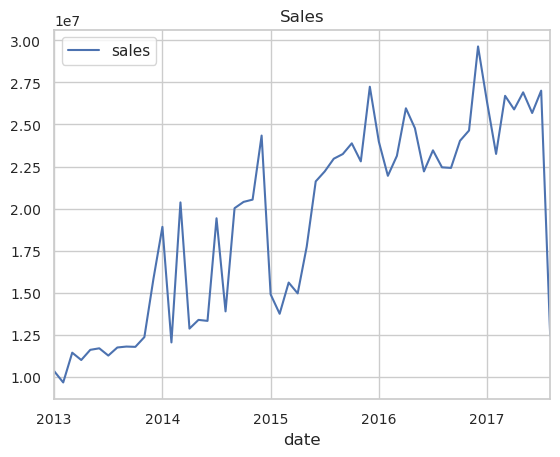

In [34]:
#visualizing sales evolution per month

df_grouped_month = (
    df_merged.groupby(by=df_merged.index)['sales']
    .sum()
    .resample(rule='MS')
    .sum()
    .reset_index()
    )
df_grouped_month.set_index('date', inplace=True)

df_grouped_month.plot()
plt.title('Sales')
plt.show()

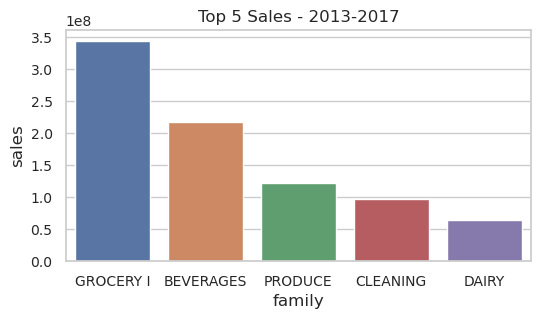

In [35]:
#Most sales per month
df_grouped_month.sales.sort_values(ascending=False)[:10]

#O que mais vendeu?
most_sales =(
    df_merged
    .groupby(by='family')['sales']
    .sum()
    .reset_index()
    .sort_values(by='sales', ascending=False))
# most_sales.head()

plt.figure(figsize=(6,3))
sns.barplot(data=most_sales[:5], x='family', y="sales")
plt.title('Top 5 Sales - 2013-2017')
plt.show()

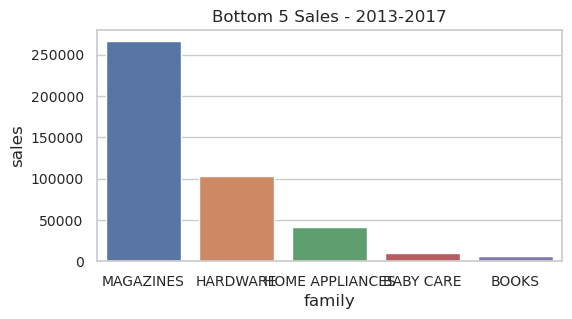

In [36]:
# O que menos vendeu?
plt.figure(figsize=(6,3))
sns.barplot(data=most_sales[-5:], x='family', y="sales")
plt.title('Bottom 5 Sales - 2013-2017')
plt.show()

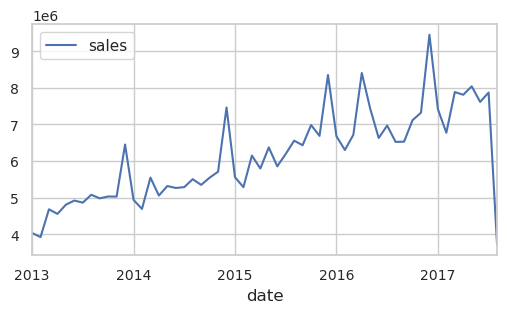

In [37]:
#Time Series Mensal de Grocery I

df_grocery_filtered0 = pd.DataFrame(df_merged[df_merged['family'] == 'GROCERY I']['sales'])
df_grocery_filtered0.resample(rule='M').sum().plot(figsize=(6,3));

Investigando o aumento excessivo das vendas em 2016 da família GROCERY I

> A magnitude 7.8 earthquake struck Ecuador on April 16, 2016. People rallied in relief efforts donating water and other first need products which greatly affected supermarket sales for several weeks after the earthquake.

Text(0.5, 1.0, 'Dispersão das vendas de GROCERY I em 2016')

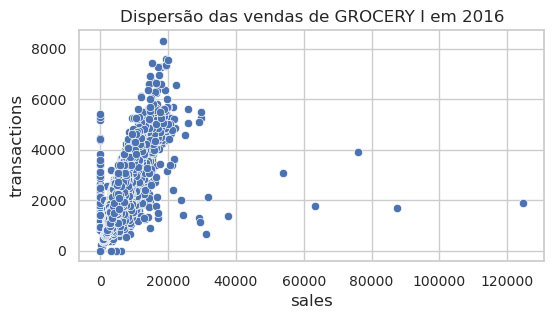

In [38]:
df_grocery_filtered = (
    df_merged[(df_merged['family']=='GROCERY I') \
              & (df_merged.index > '2015-12-31') \
              & (df_merged.index < '2017-01-01')]\
              [['sales','store_nbr','onpromotion', 'holiday', 'transactions']])
# df_grocery_filtered.head()

plt.figure(figsize=(6,3))
sns.scatterplot(data=df_grocery_filtered, 
                x="sales", 
                y="transactions");
plt.title('Dispersão das vendas de GROCERY I em 2016')

In [39]:
df_grocery_filtered.query("sales > 100000")

,sales,store_nbr,onpromotion,holiday,transactions
date,,,,,
2016-05-02,124717.0,2,59,0,1905.0


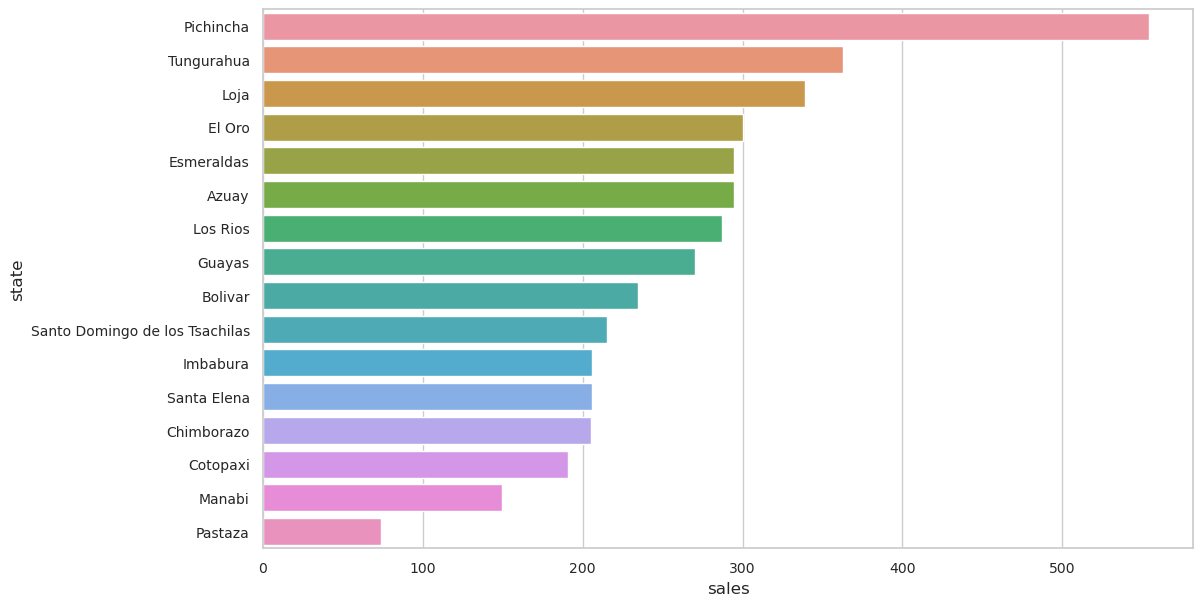

In [40]:
#Qual Província (state) gera mais economia no varejo?
df_state = (
    df_merged.groupby(by='state')['sales']
    .mean()
    .reset_index()
    .sort_values(by='sales', ascending=False)
    )
# df_state

plt.figure(figsize=(12,7))
sns.barplot(data=df_state, x="sales", y="state")
plt.show()

In [41]:
#O que mais se vende em Pichincha?
(
    df_merged[df_merged['state']=='Pichincha']
 .groupby(by='family')['sales']
 .sum().reset_index()
 .sort_values(by='sales', ascending=False)[:5]
 )

,family,sales
12,GROCERY I,1.783201e+08
3,BEVERAGES,1.196645e+08
30,PRODUCE,7.437155e+07
7,CLEANING,4.786586e+07
8,DAIRY,3.703048e+07


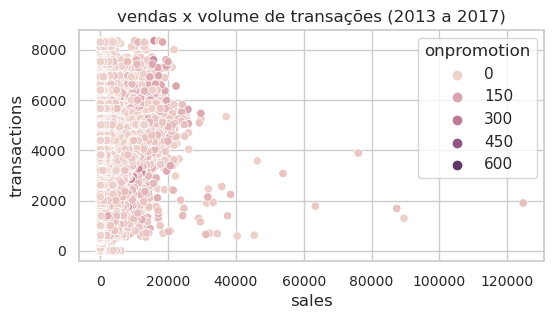

In [42]:
# Como as promoções afetam nas vendas
plt.figure(figsize=(6,3))
plt.title('vendas x volume de transações (2013 a 2017)')
sns.scatterplot(data=df_merged, x='sales', y='transactions', hue='onpromotion')
plt.show()

Os feriados afetam nas vendas?

há aumento nas vendas a cada quinzena já que os servidores públicos recebem a cada quinzena?


Qual comportamento das vendas entre 2013 e 2014? 
Antes do terremoto, quando os preços atingiram a mínima, como foram as vendas?

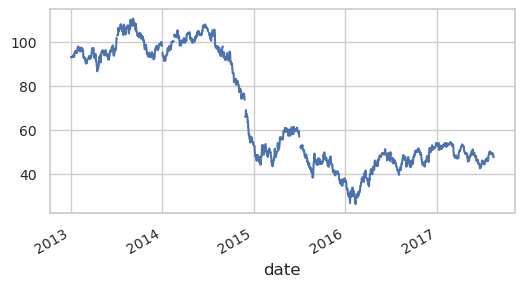

In [43]:
# oil

df_merged['dcoilwtico'].plot(figsize=(6,3));